In this repository we look trough the CIFAR-10 dataset using Keras 

The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class


CIFAR-10 is a set of images that can be used to teach a computer how to recognize objects. Since the images in CIFAR-10 are low-resolution (32x32), this dataset can allow researchers to quickly try different algorithms to see what works. Various kinds of convolutional neural networks tend to be the best at recognizing the images in CIFAR-10.

In [1]:
#imports
import numpy as np # linear algebra
import pandas as pd # data processing
from keras.datasets import cifar10

Using TensorFlow backend.


In [3]:
import os
import tarfile
import sys
import pickle


In [4]:
import keras
from keras import backend   as K
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Any results you write to the cur

In [5]:
def load_batch(fpath, label_key='labels'):
    """Internal utility for parsing CIFAR data.

    # Arguments
        fpath: path the file to parse.
        label_key: key for label data in the retrieve
            dictionary.

    # Returns
        A tuple `(data, labels)`.
    """
    with open(fpath, 'rb') as f:
        if sys.version_info < (3,):
            d = pickle.load(f)
        else:
            d = pickle.load(f, encoding='bytes')
            # decode utf8
            d_decoded = {}
            for k, v in d.items():
                d_decoded[k.decode('utf8')] = v
            d = d_decoded
    data = d['data']
    labels = d[label_key]

    data = data.reshape(data.shape[0], 3, 32, 32)
    return data, labels


In [6]:
train_num = 50000
train_x = np.zeros(shape=(train_num,3,32,32))
train_y = np.zeros(shape=(train_num))

test_num = 10000
test_x = np.zeros(shape=(test_num,3,32,32))
test_y = np.zeros(shape=(test_num))

In [7]:
def load_data():
    for i in range(1,6):
        begin = (i-1)*10000
        end = i*10000
        train_x[begin:end,:,:,:],train_y[begin:end] = load_batch("../input/cifar-10-python/cifar-10-batches-py/data_batch_"+str(i))
    
    test_x[:],test_y[:] = load_batch("../input/cifar-10-python/cifar-10-batches-py/test_batch")

In [8]:
test_y[1:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
if K.image_data_format() == 'channels_last':
    print("channels_last")
    test_x = test_x.transpose(0, 2, 3, 1)
    train_x = train_x.transpose(0, 2, 3, 1)
else:
    print("channels_first")

channels_last


In [10]:
train_x.shape


(50000, 32, 32, 3)

In [11]:
train_y.shape

(50000,)

In [12]:
train_y[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
test_x.shape

(10000, 32, 32, 3)

In [14]:
test_y.shape

(10000,)

In [15]:
#normalization
train_x = train_x/255.0
test_x = test_x/255.0

In [16]:
train_y = to_categorical(train_y,10)
test_y = to_categorical(test_y,10)

In [17]:
train_x.shape

(50000, 32, 32, 3)

In [18]:
train_y.shape

(50000, 10)

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=train_x.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [20]:
batch_size = 32
epochs = 100

In [21]:
history = model.fit(train_x,train_y,batch_size,epochs,validation_data=(test_x,test_y),shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 266s 5ms/step - loss: 2.1621 - acc: 1.0000 - val_loss: 2.0247 - val_acc: 1.0000
Epoch 2/100
50000/50000 [==============================] - 403s 8ms/step - loss: 1.8915 - acc: 1.0000 - val_loss: 1.7601 - val_acc: 1.0000
Epoch 3/100
50000/50000 [==============================] - 424s 8ms/step - loss: 1.6337 - acc: 1.0000 - val_loss: 1.5097 - val_acc: 1.0000
Epoch 4/100
50000/50000 [==============================] - 433s 9ms/step - loss: 1.3917 - acc: 1.0000 - val_loss: 1.2764 - val_acc: 1.0000
Epoch 5/100
50000/50000 [==============================] - 419s 8ms/step - loss: 1.1680 - acc: 1.0000 - val_loss: 1.0629 - val_acc: 1.0000
Epoch 6/100
50000/50000 [==============================] - 425s 9ms/step - loss: 0.9653 - acc: 1.0000 - val_loss: 0.8713 - val_acc: 1.0000
Epoch 7/100
50000/50000 [==============================] - 434s 9ms/step - loss: 0.7854 - acc: 1.0000 - val_loss: 0.

KeyboardInterrupt: 

In [21]:
#histroy.history

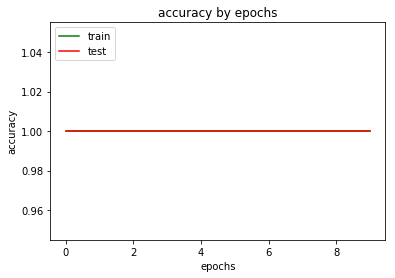

In [22]:
fig = plt.plot(history.history["acc"],label = "train", color='green')
plt.plot(history.history["val_acc"],label = "test", color='red')
plt.legend(loc='upper left')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy by epochs")
plt.show()